In [1]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path

In [3]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

True
1
NVIDIA GeForce RTX 4080 Laptop GPU


In [19]:
x  = r'improved_images'
path = Path(x)
path.ls()

(#5) [Path('improved_images/.DS_Store'),Path('improved_images/happy'),Path('improved_images/neutral'),Path('improved_images/sad'),Path('improved_images/suprise')]

In [20]:
from fastai.vision.all import *

np.random.seed(40)

data = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2,
    seed=40,
    bs=32,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=1.0)
)


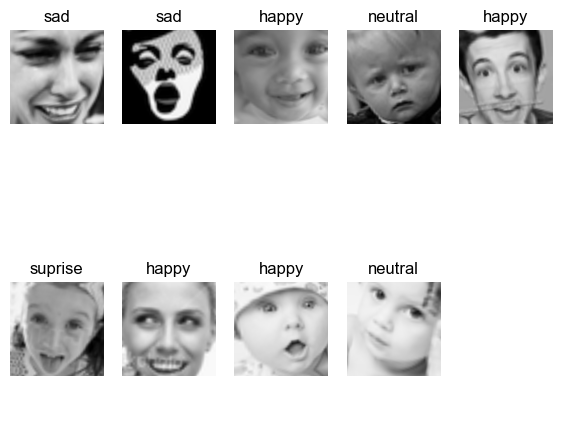

In [21]:
data.show_batch(nrows=2, figsize=(7,6))

In [22]:
print(data.vocab)


['happy', 'neutral', 'sad', 'suprise']


In [23]:
learn = vision_learner(
    data,
    resnet18,
    metrics=[accuracy],
    model_dir=Path("emotion_cnn_model")
)


Suggested LR: 0.001737800776027143


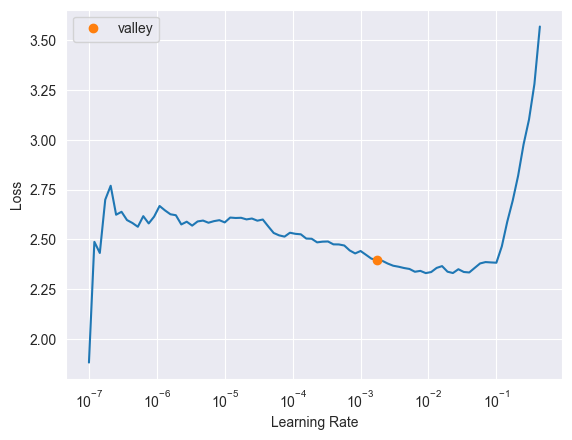

In [24]:
lr_finder = learn.lr_find()   # runs LR finder

print("Suggested LR:", lr_finder.valley)


In [31]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(60,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.530172,7.158048,0.721731,00:12
1,0.598834,2.682687,0.643068,00:11
2,0.620490,3.470237,0.706981,00:11
3,0.703297,37.729176,0.608653,00:11
4,0.815373,1.739035,0.604720,00:11
5,0.821589,3.317163,0.685349,00:11
6,0.971078,407.831207,0.431662,00:11
7,1.113006,40.770069,0.566372,00:11
8,1.084864,3.108013,0.483776,00:11
9,1.169460,3.917902,0.530973,00:11


In [32]:
learn.unfreeze()
learn.fit_one_cycle(40,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.193787,2.513000,0.767945,00:12
1,0.192370,0.917309,0.769912,00:11
2,0.188002,1.224559,0.765978,00:11
3,0.188337,0.881955,0.775811,00:11
4,0.183249,0.867081,0.774828,00:11
5,0.180783,0.959427,0.770895,00:11
6,0.181039,0.906761,0.767945,00:11
7,0.159252,0.920615,0.766962,00:11
8,0.173904,0.919399,0.775811,00:12
9,0.176020,0.884329,0.768928,00:11


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

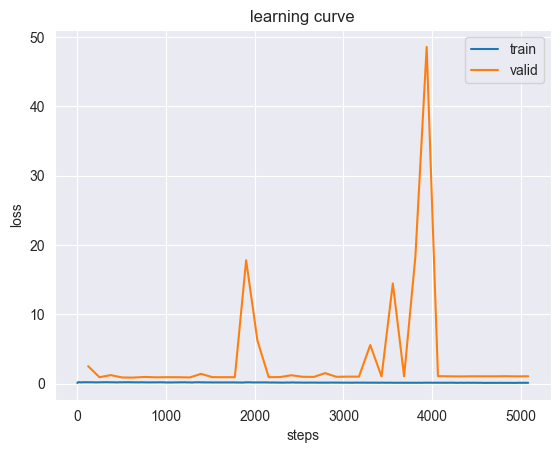

In [33]:
learn.recorder.plot_loss()

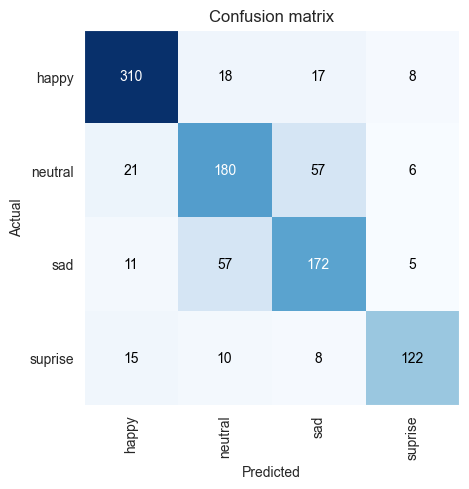

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

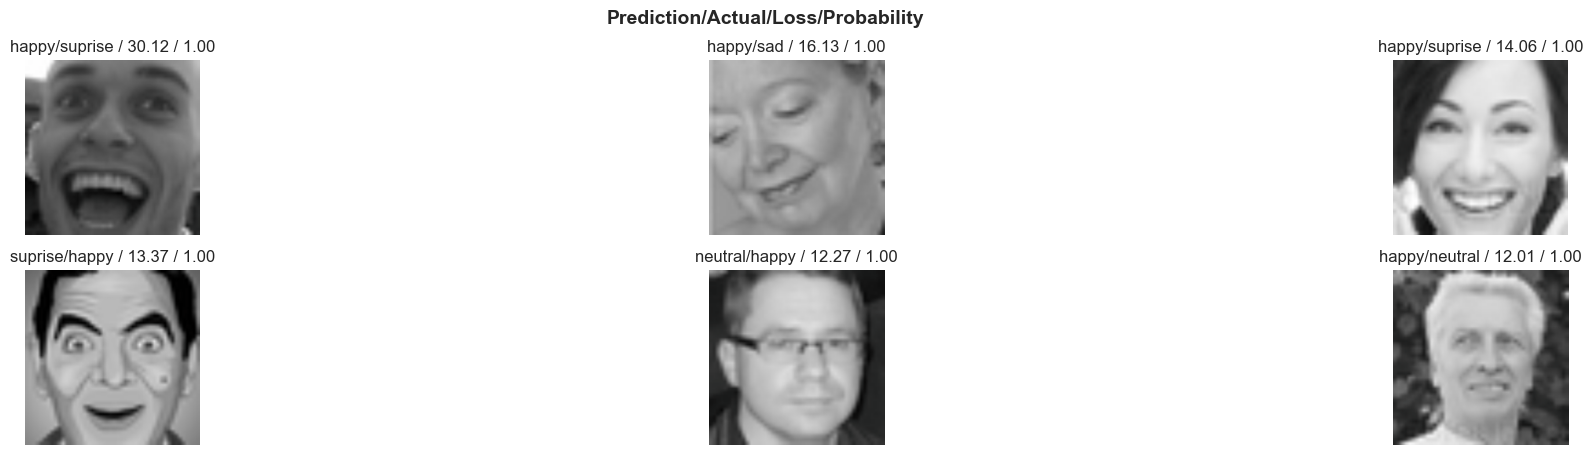

In [35]:
interp.plot_top_losses(6,figsize = (25,5))

In [36]:
learn.export(Path(r"C:\Users\sbval\PycharmProjects\MLSN-Team-6\emotion_classifier.pkl"))